Data Source: https://www.kaggle.com/datasets/utkalk/large-retail-data-set-for-eda \
Target: Exploring Insights from Transaction, Customer, and Sales on Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## 1. Cleaning, standardizing dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Untitled folder/retail_data.csv")
data.head()

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,occupation,transaction_id,transaction_date,product_id,product_category,quantity,unit_price,discount_applied,payment_method,store_location,transaction_hour,day_of_week,week_of_year,month_of_year,avg_purchase_value,purchase_frequency,last_purchase_date,avg_discount_used,preferred_store,online_purchases,in_store_purchases,avg_items_per_transaction,avg_transaction_value,total_returned_items,total_returned_value,total_sales,total_transactions,total_items_purchased,total_discounts_received,avg_spent_per_category,max_single_purchase_value,min_single_purchase_value,product_name,product_brand,product_rating,product_review_count,product_stock,product_return_rate,product_size,product_weight,product_color,product_material,product_manufacture_date,product_expiry_date,product_shelf_life,promotion_id,promotion_type,promotion_start_date,promotion_end_date,promotion_effectiveness,promotion_channel,promotion_target_audience,customer_zip_code,customer_city,customer_state,store_zip_code,store_city,store_state,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,Self-Employed,503290,2020-10-11 10:08:52,1480,Electronics,8,49.72,0.50,Credit Card,Location A,18,Wednesday,27,7,411.13,Weekly,2021-09-11 04:22:38,0.02,Location A,55,86,8.64,171.83,0,750.40,563.16,69,367,415.01,114.28,679.25,0.28,Product D,Brand Y,2.5,560,48,0.40,Small,4.61,Red,Metal,2019-08-04 01:47:01,2022-05-28 14:54:02,250,271,20% Off,2021-07-14 14:28:42,2022-12-30 13:04:13,High,Online,New Customers,37848,City D,State Y,88500,City D,State Y,33.21,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,Unemployed,347796,2021-12-08 01:07:40,1597,Groceries,7,817.76,0.32,Credit Card,Location C,15,Friday,20,2,268.71,Daily,2021-05-16 12:01:16,0.33,Location C,48,2,9.60,20.18,4,551.60,7554.57,8,475,801.79,305.95,491.56,4.65,Product C,Brand X,4.7,413,80,0.30,Medium,0.84,Blue,Metal,2019-10-23 19:59:17,2022-12-19 08:04:41,180,631,Flash Sale,2021-09-23 04:26:09,2022-09-13 03:16:26,Low,Social Media,New Customers,44896,City A,State X,30046,City C,State X,62.56,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,Self-Employed,493688,2020-02-17 09:40:48,5142,Toys,8,270.30,0.35,Debit Card,Location A,9,Saturday,35,6,246.79,Weekly,2021-02-07 16:47:48,0.47,Location B,16,45,1.55,55.17,0,629.19,7564.14,73,138,264.31,426.70,938.26,7.30,Product B,Brand X,4.6,312,14,0.08,Medium,0.23,Green,Plastic,2018-05-12 08:00:29,2023-02-01 12:15:07,131,879,Flash Sale,2021-06-13 12:31:15,2022-03-13 00:53:35,Low,Online,New Customers,11816,City B,State X,26169,City A,State Y,83.04,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,Employed,861348,2020-08-13 00:43:14,8447,Toys,2,547.84,0.10,Credit Card,Location A,13,Friday,42,8,178.92,Weekly,2021-12-30 23:48:26,0.41,Location B,50,47,1.78,15.79,3,346.67,8125.92,20,158,192.93,689.58,644.31,7.31,Product A,Brand Z,1.1,110,69,0.09,Large,4.37,Blue,Wood,2019-11-15 16:17:29,2023-02-05 11:46:57,16,211,Buy One Get One Free,2021-05-23 05:42:48,2022-02-06 00:42:30,High,Social Media,Returning Customers,78604,City A,State Y,22667,City B,State Z,50.43,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,Employed,535835,2021-07-02 11:59:03,6025,Clothing,4,785.29,0.17,Mobile Payment,Location C,17,Monday,37,3,214.06,Yearly,2021-11-02 11:48:25,0.22,Location B,48,42,9.38,240.03,2,979.91,114.32,83,263,497.26,715.86,162.86,1.92,Product C,Brand X,3.8,172,25,0.39,Small,1.68,Red,Metal,2019-08-27 02:58:19,2023-10-05 08:13:07,57,862,Flash Sale,2021-04-19 04:55:32,2022-12-04 13:07:09,Medium,Online,New Customers,17760,City B,State Z,87843,City C,State X,36.55,Yes,Summer,Yes,3,No,Medium,31,Low,242


In [ ]:
data.head()

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,occupation,transaction_id,transaction_date,product_id,product_category,quantity,unit_price,discount_applied,payment_method,store_location,transaction_hour,day_of_week,week_of_year,month_of_year,avg_purchase_value,purchase_frequency,last_purchase_date,avg_discount_used,preferred_store,online_purchases,in_store_purchases,avg_items_per_transaction,avg_transaction_value,total_returned_items,total_returned_value,total_sales,total_transactions,total_items_purchased,total_discounts_received,avg_spent_per_category,max_single_purchase_value,min_single_purchase_value,product_name,product_brand,product_rating,product_review_count,product_stock,product_return_rate,product_size,product_weight,product_color,product_material,product_manufacture_date,product_expiry_date,product_shelf_life,promotion_id,promotion_type,promotion_start_date,promotion_end_date,promotion_effectiveness,promotion_channel,promotion_target_audience,customer_zip_code,customer_city,customer_state,store_zip_code,store_city,store_state,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,Self-Employed,503290,2020-10-11 10:08:52,1480,Electronics,8,49.72,0.50,Credit Card,Location A,18,Wednesday,27,7,411.13,Weekly,2021-09-11 04:22:38,0.02,Location A,55,86,8.64,171.83,0,750.40,563.16,69,367,415.01,114.28,679.25,0.28,Product D,Brand Y,2.5,560,48,0.40,Small,4.61,Red,Metal,2019-08-04 01:47:01,2022-05-28 14:54:02,250,271,20% Off,2021-07-14 14:28:42,2022-12-30 13:04:13,High,Online,New Customers,37848,City D,State Y,88500,City D,State Y,33.21,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,Unemployed,347796,2021-12-08 01:07:40,1597,Groceries,7,817.76,0.32,Credit Card,Location C,15,Friday,20,2,268.71,Daily,2021-05-16 12:01:16,0.33,Location C,48,2,9.60,20.18,4,551.60,7554.57,8,475,801.79,305.95,491.56,4.65,Product C,Brand X,4.7,413,80,0.30,Medium,0.84,Blue,Metal,2019-10-23 19:59:17,2022-12-19 08:04:41,180,631,Flash Sale,2021-09-23 04:26:09,2022-09-13 03:16:26,Low,Social Media,New Customers,44896,City A,State X,30046,City C,State X,62.56,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,Self-Employed,493688,2020-02-17 09:40:48,5142,Toys,8,270.30,0.35,Debit Card,Location A,9,Saturday,35,6,246.79,Weekly,2021-02-07 16:47:48,0.47,Location B,16,45,1.55,55.17,0,629.19,7564.14,73,138,264.31,426.70,938.26,7.30,Product B,Brand X,4.6,312,14,0.08,Medium,0.23,Green,Plastic,2018-05-12 08:00:29,2023-02-01 12:15:07,131,879,Flash Sale,2021-06-13 12:31:15,2022-03-13 00:53:35,Low,Online,New Customers,11816,City B,State X,26169,City A,State Y,83.04,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,Employed,861348,2020-08-13 00:43:14,8447,Toys,2,547.84,0.10,Credit Card,Location A,13,Friday,42,8,178.92,Weekly,2021-12-30 23:48:26,0.41,Location B,50,47,1.78,15.79,3,346.67,8125.92,20,158,192.93,689.58,644.31,7.31,Product A,Brand Z,1.1,110,69,0.09,Large,4.37,Blue,Wood,2019-11-15 16:17:29,2023-02-05 11:46:57,16,211,Buy One Get One Free,2021-05-23 05:42:48,2022-02-06 00:42:30,High,Social Media,Returning Customers,78604,City A,State Y,22667,City B,State Z,50.43,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,Employed,535835,2021-07-02 11:59:03,6025,Clothing,4,785.29,0.17,Mobile Payment,Location C,17,Monday,37,3,214.06,Yearly,2021-11-02 11:48:25,0.22,Location B,48,42,9.38,240.03,2,979.91,114.32,83,263,497.26,715.86,162.86,1.92,Product C,Brand X,3.8,172,25,0.39,Small,1.68,Red,Metal,2019-08-27 02:58:19,2023-10-05 08:13:07,57,862,Flash Sale,2021-04-19 04:55:32,2022-12-04 13:07:09,Medium,Online,New Customers,17760,City B,State Z,87843,City C,State X,36.55,Yes,Summer,Yes,3,No,Medium,31,Low,242


In [ ]:
data.describe()

,customer_id,age,membership_years,number_of_children,transaction_id,product_id,quantity,unit_price,discount_applied,transaction_hour,week_of_year,month_of_year,avg_purchase_value,avg_discount_used,online_purchases,in_store_purchases,avg_items_per_transaction,avg_transaction_value,total_returned_items,total_returned_value,total_sales,total_transactions,total_items_purchased,total_discounts_received,avg_spent_per_category,max_single_purchase_value,min_single_purchase_value,product_rating,product_review_count,product_stock,product_return_rate,product_weight,product_shelf_life,promotion_id,customer_zip_code,store_zip_code,distance_to_store,customer_support_calls,website_visits,days_since_last_purchase
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,48.496605,4.497453,2.000554,499891.731447,4999.564515,5.002649,500.261317,0.249910,11.505193,26.503691,6.497467,254.886444,0.250010,49.446018,49.484486,5.503122,255.115768,4.498142,500.387837,5056.059765,49.987386,250.042763,499.674388,505.175478,505.001404,5.043849,2.999010,499.235198,49.515129,0.250137,5.054372,181.876207,499.920037,54993.644773,54972.766714,49.979109,9.496269,49.512951,182.027559
std,288675.278932,17.874381,2.872406,1.414214,288706.057652,2886.798391,2.583751,288.462860,0.144328,6.924460,15.005165,3.455212,141.494923,0.144383,28.861439,28.882712,2.597661,141.430014,2.872805,288.717476,2859.100058,28.571689,143.984546,288.579102,286.059178,286.073324,2.855905,1.154801,288.446150,28.876645,0.144408,2.857848,105.228855,288.453056,25975.807799,25981.483139,28.860989,5.761233,28.869777,105.364598
min,1.000000,18.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000,100.010000,1.000000,1.000000,0.000000,10.000000,10.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.100000,0.000000,1.000000,10000.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
25%,250000.750000,33.000000,2.000000,1.000000,249878.750000,2498.000000,3.000000,250.310000,0.130000,5.000000,14.000000,3.000000,132.220000,0.130000,24.000000,24.000000,3.260000,132.510000,2.000000,250.630000,2577.867500,25.000000,125.000000,249.760000,257.240000,256.840000,2.570000,2.000000,250.000000,25.000000,0.130000,2.580000,91.000000,250.000000,32477.750000,32473.000000,24.970000,4.000000,25.000000,91.000000
50%,500000.500000,49.000000,4.000000,2.000000,499559.500000,4999.000000,5.000000,500.410000,0.250000,12.000000,27.000000,7.000000,254.930000,0.250000,49.000000,49.000000,5.500000,255.230000,4.000000,500.400000,5059.695000,50.000000,250.000000,499.510000,505.140000,505.220000,5.040000,3.000000,499.000000,49.000000,0.250000,5.060000,182.000000,500.000000,54966.000000,54961.000000,49.960000,9.000000,50.000000,182.000000
75%,750000.250000,64.000000,7.000000,3.000000,750071.250000,7498.000000,7.000000,750.160000,0.370000,18.000000,39.000000,10.000000,377.350000,0.380000,74.000000,75.000000,7.750000,377.670000,7.000000,750.390000,7534.802500,75.000000,375.000000,749.540000,753.060000,753.210000,7.510000,4.000000,749.000000,75.000000,0.380000,7.530000,273.000000,750.000000,77493.000000,77451.000000,74.950000,14.000000,75.000000,273.000000
max,1000000.000000,79.000000,9.000000,4.000000,999999.000000,9999.000000,9.000000,1000.000000,0.500000,23.000000,52.000000,12.000000,500.000000,0.500000,99.000000,99.000000,10.000000,500.000000,9.000000,1

In [ ]:
print("Number columns of dataset: ", data.shape[1])
print("Number rows of dataset: ", data.shape[0])

Number columns of dataset:  78
Number rows of dataset:  1000000


### Null value check

In [ ]:
null_columns = data.columns[data.isnull().sum() > 0]
print("Number of column whose value is null: ", len(null_columns))

Number of column whose value is null:  0


### Type Value check

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 78 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   customer_id                1000000 non-null  int64  
 1   age                        1000000 non-null  int64  
 2   gender                     1000000 non-null  object 
 3   income_bracket             1000000 non-null  object 
 4   loyalty_program            1000000 non-null  object 
 5   membership_years           1000000 non-null  int64  
 6   churned                    1000000 non-null  object 
 7   marital_status             1000000 non-null  object 
 8   number_of_children         1000000 non-null  int64  
 9   education_level            1000000 non-null  object 
 10  occupation                 1000000 non-null  object 
 11  transaction_id             1000000 non-null  int64  
 12  transaction_date           1000000 non-null  object 
 13  product_id   

In [ ]:
changes_datetime = ['product_manufacture_date', 'transaction_date', 'last_purchase_date', 'product_expiry_date', 'promotion_start_date', 'promotion_end_date']
for item in changes_datetime:
  data[item] = pd.to_datetime(data[item])

In [ ]:
summary = {}

for column in data.columns:
    if data[column].dtype == 'object':
        summary[column] = {
            'Number of categories': data[column].nunique(),
            'Frequency': data[column].value_counts().to_dict()
        }

summary_df = pd.DataFrame(summary).T
print(summary_df)

                          Number of categories  \
gender                                       3   
income_bracket                               3   
loyalty_program                              2   
churned                                      2   
marital_status                               3   
education_level                              4   
occupation                                   4   
product_category                             5   
payment_method                               4   
store_location                               4   
day_of_week                                  7   
purchase_frequency                           4   
preferred_store                              4   
product_name                                 4   
product_brand                                3   
product_size                                 3   
product_color                                5   
product_material                             4   
promotion_type                               3   


## 2. Transactional Analysis:

    transaction_id: Unique identifier for each transaction.\
    transaction_date: Date of the transaction.\
    product_id: Unique identifier for each product.\
    product_category: Category of the product (e.g., Electronics, Clothing, Groceries).\
    quantity: Quantity of the product purchased.\
    unit_price: Price per unit of the product.\
    discount_applied: Discount applied on the transaction.\
    payment_method: Payment method used (e.g., Credit Card, Debit Card, Cash).\
    store_location: Location of the store where the purchase was made.\

In [ ]:
trans_columns = ['transaction_id', 'transaction_date', 'product_id', 'product_category', 'quantity', 'unit_price', 'discount_applied', 'payment_method', 'store_location', 'total_sales',]
trans_df = data[trans_columns]
trans_df.head()

,transaction_id,transaction_date,product_id,product_category,quantity,unit_price,discount_applied,payment_method,store_location,total_sales
0,503290,2020-10-11 10:08:52,1480,Electronics,8,49.72,0.50,Credit Card,Location A,563.16
1,347796,2021-12-08 01:07:40,1597,Groceries,7,817.76,0.32,Credit Card,Location C,7554.57
2,493688,2020-02-17 09:40:48,5142,Toys,8,270.30,0.35,Debit Card,Location A,7564.14
3,861348,2020-08-13 00:43:14,8447,Toys,2,547.84,0.10,Credit Card,Location A,8125.92
4,535835,2021-07-02 11:59:03,6025,Clothing,4,785.29,0.17,Mobile Payment,Location C,114.32


<ipython-input-11-aa9a5fb74215>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df['month'] = trans_df['transaction_date'].dt.month


Text(0.5, 1.0, 'Discount vs Total Sale Over Time')

<Figure size 1000x600 with 0 Axes>

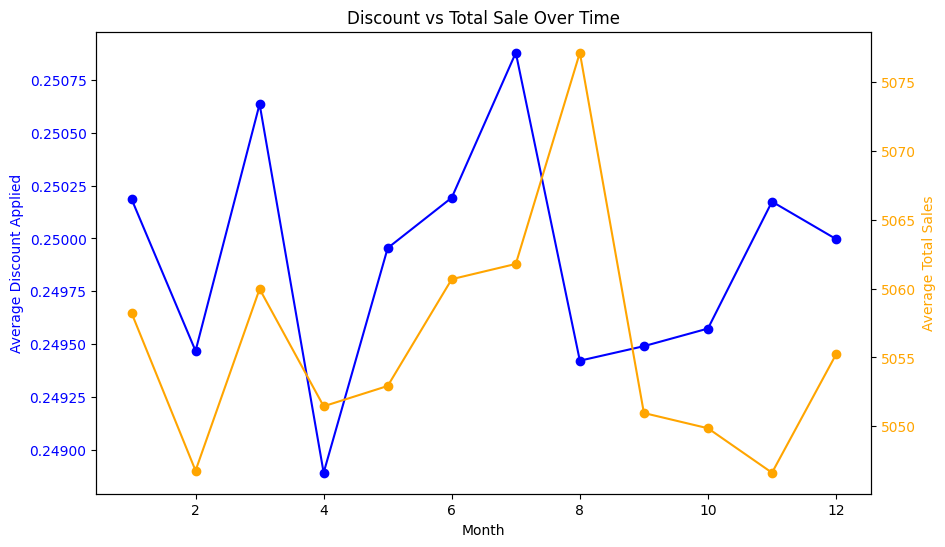

In [ ]:
trans_df['month'] = trans_df['transaction_date'].dt.month
plt.figure(figsize=(10, 6))
plt.rcParams['agg.path.chunksize'] = 10000
fig, ax1 = plt.subplots(figsize=(10, 6))

trans_acc = trans_df.groupby('month')['discount_applied'].mean()
trans_acc1 = trans_df.groupby('month')['total_sales'].mean()
ax1.plot(trans_acc.index, trans_acc.values, label='Discount', marker='o', color = 'blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Discount Applied', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(trans_acc1.index, trans_acc1.values, label='Total Sale', marker='o', color = 'orange')
ax2.set_ylabel('Average Total Sales', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Discount vs Total Sale Over Time')

- In the first half of the year, discount codes and revenue tend to move in the same direction. However, in the second half of the year, they move in the opposite direction. This suggests that sellers use discount codes to attract customers because typically, at the end of the previous year, customers have spent their money on preparing for the new year. Thus, in the first six months, there is less demand for purchasing, so discount policies are implemented to boost revenue and achieve profitability.

- August is the month with the highest revenue of the year, but discount codes are relatively low on average. This suggests that items most needed in August are in high demand, making it an optimal time to achieve the highest annual profits.

<ipython-input-12-d8c859dc3b5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df['year_transaction'] = trans_df['transaction_date'].dt.year


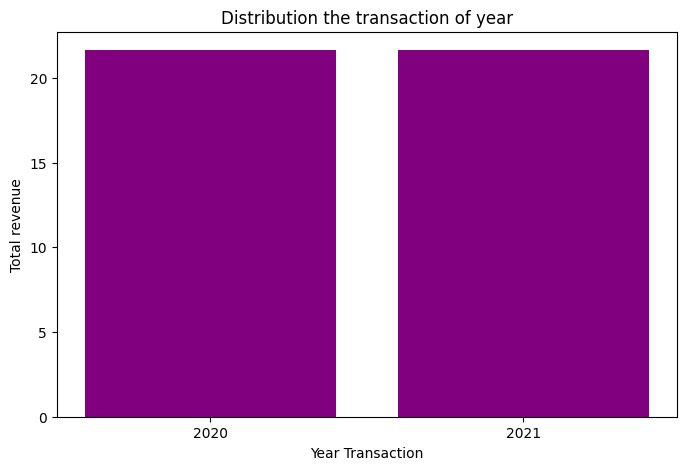

In [ ]:
trans_df['year_transaction'] = trans_df['transaction_date'].dt.year
trans_according_year = trans_df.groupby('year_transaction')['total_sales'].sum()
trans_according_year = np.log1p(trans_according_year)

plt.figure(figsize=(8, 5))
plt.bar(list(trans_according_year.keys()), list(trans_according_year.values), color='purple')
plt.title('Distribution the transaction of year')
plt.xlabel('Year Transaction')
plt.ylabel('Total revenue')
plt.xticks(list(trans_according_year.keys()))
plt.grid(False)
plt.show()

In [ ]:
trans_according_year.values

array([21.65263648, 21.64877205])

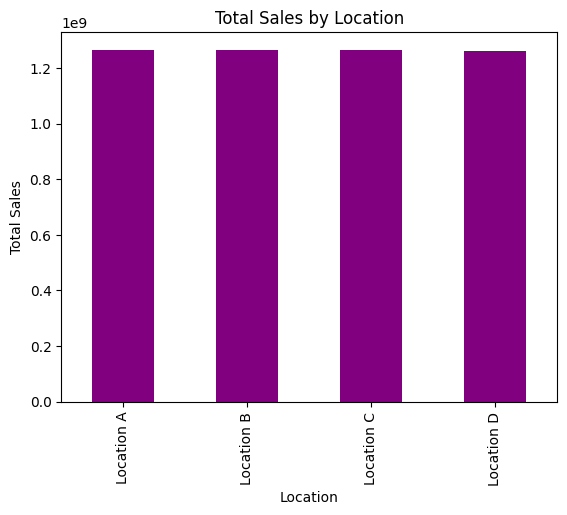

In [ ]:
sales_by_store = trans_df.groupby('store_location')['total_sales'].sum()

sales_by_store.plot(kind='bar', color='purple')
plt.title('Total Sales by Location')
plt.xlabel('Location')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
sales_by_store

,total_sales
store_location,
Location A,1.264147e+09
Location B,1.264592e+09
Location C,1.265778e+09
Location D,1.261542e+09


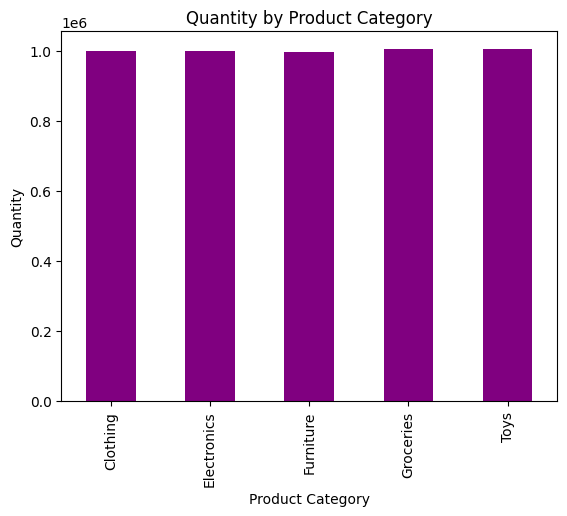

In [ ]:
sales_by_store = trans_df.groupby('product_category')['quantity'].sum()

sales_by_store.plot(kind='bar', color='purple')
plt.title('Quantity by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.show()

Due to the large scale of the data, the differences are not clearly visible, but they do exist in reality.
Comparing the revenue of 2020 with 2021, among the stores, and among the types of products, all values are approximately the same. Could it be that the business is achieving high efficiency and consistency across different areas, or is it just a coincidence due to the data collected in 2020 and 2021, a period when the pandemic caused a similar decline in sales for all items, leading to comparable figures? Looking at the products the business sells—Clothing, Electronics, Furniture, and Toys—these items are not considered essential during the economic conditions of the pandemic, unlike Groceries. However, Groceries have revenue comparable to other items because they are not as expensive and are purchased in large quantities, leading to high revenue similar to other product categories

<ipython-input-17-a384b4d9432e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df['hour'] = trans_df['transaction_date'].apply(lambda x: int(x.hour))


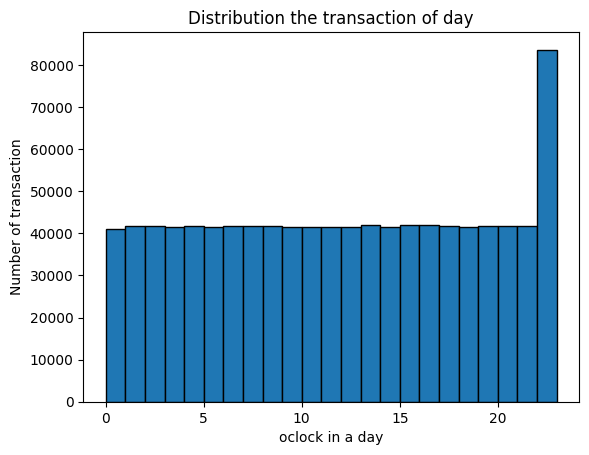

In [ ]:
trans_df['hour'] = trans_df['transaction_date'].apply(lambda x: int(x.hour))
plt.hist(trans_df['hour'], bins=range(24), edgecolor='black')
plt.xlabel('oclock in a day')
plt.ylabel('Number of transaction')
plt.title('Distribution the transaction of day')
plt.show()

The result is surprising: customers tend to make purchases at all hours of the day, particularly at 11 PM

It's unusual for customers to make so many purchases at 11 PM, as this is typically a time for rest. However, this could be due to the store's locations being in different time zones, leading to discrepancies in the recorded time. The data collection might be done from a single location, which could explain why it appears that there is high activity at this hour.

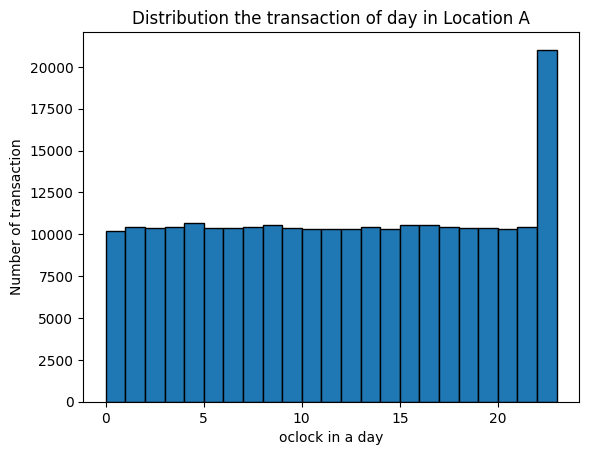

In [ ]:
trans_locationA = trans_df[trans_df['store_location'] == 'Location A']
plt.hist(trans_locationA['hour'], bins=range(24), edgecolor='black')
plt.xlabel('oclock in a day')
plt.ylabel('Number of transaction')
plt.title('Distribution the transaction of day in Location A')
plt.show()

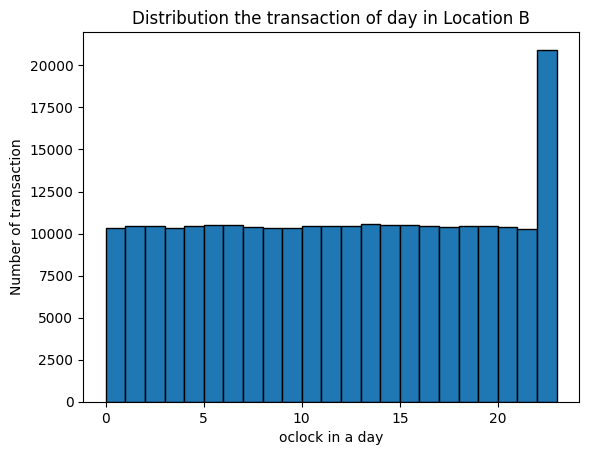

In [ ]:
trans_locationB = trans_df[trans_df['store_location'] == 'Location B']
plt.hist(trans_locationB['hour'], bins=range(24), edgecolor='black')
plt.xlabel('oclock in a day')
plt.ylabel('Number of transaction')
plt.title('Distribution the transaction of day in Location B')
plt.show()

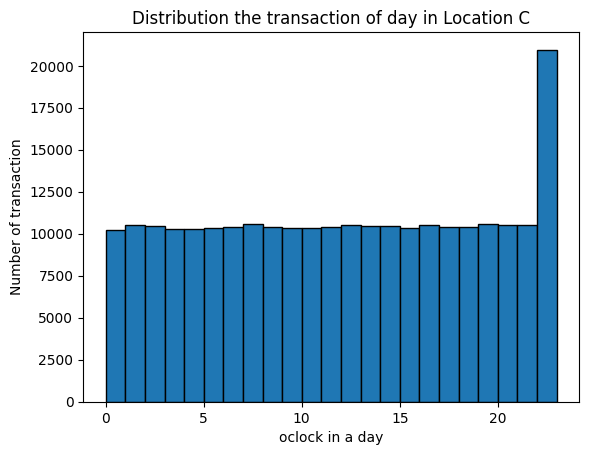

In [ ]:
trans_locationC = trans_df[trans_df['store_location'] == 'Location C']
plt.hist(trans_locationC['hour'], bins=range(24), edgecolor='black')
plt.xlabel('oclock in a day')
plt.ylabel('Number of transaction')
plt.title('Distribution the transaction of day in Location C')
plt.show()

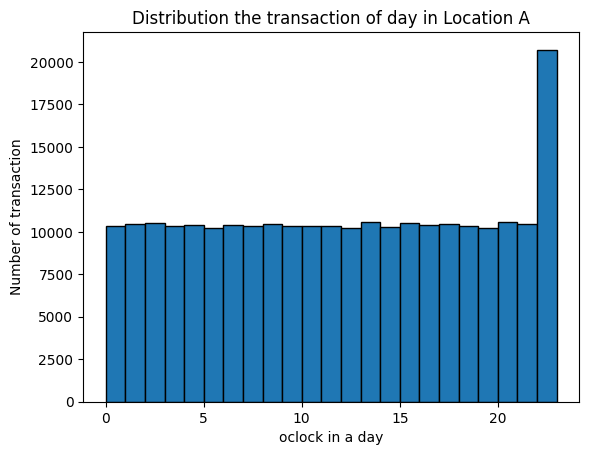

In [ ]:
trans_locationA = trans_df[trans_df['store_location'] == 'Location D']
plt.hist(trans_locationA['hour'], bins=range(24), edgecolor='black')
plt.xlabel('oclock in a day')
plt.ylabel('Number of transaction')
plt.title('Distribution the transaction of day in Location A')
plt.show()

## 3. Customer Information:

    customer_id: Unique identifier for each customer. \
    age: Age of the customer.\
    gender: Gender of the customer (e.g., Male, Female, Other).\
    income_bracket: Income bracket of the customer (e.g., Low, Medium, High).\
    loyalty_program: Whether the customer is part of a loyalty program (Yes/No).\
    membership_years: Number of years the customer has been a member.\
    churned: Whether the customer has churned (Yes/No) - Target for classification.\
    marital_status: Marital status of the customer.\
    number_of_children: Number of children the customer has.\
    education_level: Education level of the customer (e.g., High School, Bachelor's, Master's).\
    occupation: Occupation of the customer.\

In [ ]:
customer_columns = ['customer_id', 'age', 'gender', 'income_bracket', 'loyalty_program', 'membership_years', 'churned', 'marital_status', 'number_of_children', 'education_level', 'occupation', 'total_sales']
customer_df = data[customer_columns]
customer_df.head()

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,occupation,total_sales
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,Self-Employed,563.16
1,2,69,Female,Medium,No,2,No,Married,2,PhD,Unemployed,7554.57
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,Self-Employed,7564.14
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,Employed,8125.92
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,Employed,114.32


(0.0, 1.0, 0.0, 1.0)

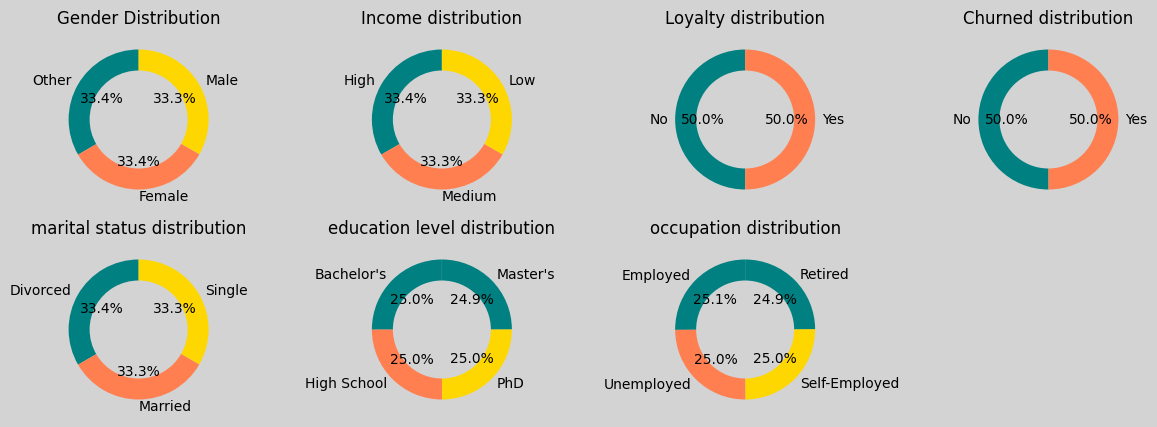

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5), subplot_kw=dict(aspect='equal'))
fig.patch.set_facecolor('lightgrey')
def plot_categories(ax, data, labels, title):
    wedges, texts, autotexts = ax.pie(data, labels=labels, autopct='%1.1f%%',
                                      wedgeprops=dict(width=0.3), startangle=90, colors = ['teal', 'coral', 'gold'])
    ax.set_title(title)
    for text in autotexts:
        text.set_color('black')
    for text in texts:
        text.set_color('black')

gender_counts = data['gender'].value_counts()
plot_categories(axes[0][0], gender_counts, gender_counts.index, 'Gender Distribution')

income_counts = data['income_bracket'].value_counts()
plot_categories(axes[0][1], income_counts, income_counts.index, 'Income distribution')

loyalty_counts = data['loyalty_program'].value_counts()
plot_categories(axes[0][2], loyalty_counts, loyalty_counts.index, 'Loyalty distribution')

churned_counts = data['churned'].value_counts()
plot_categories(axes[0][3], churned_counts, churned_counts.index, 'Churned distribution')

marital_counts = data['marital_status'].value_counts()
plot_categories(axes[1][0], marital_counts, marital_counts.index, 'marital status distribution')

marital_counts = data['education_level'].value_counts()
plot_categories(axes[1][1], marital_counts, marital_counts.index, 'education level distribution')

marital_counts = data['occupation'].value_counts()
plot_categories(axes[1][2], marital_counts, marital_counts.index, 'occupation distribution')

axes[1][3].axis('off')

A surprising point is that the ratios divide evenly into each other within a variable.

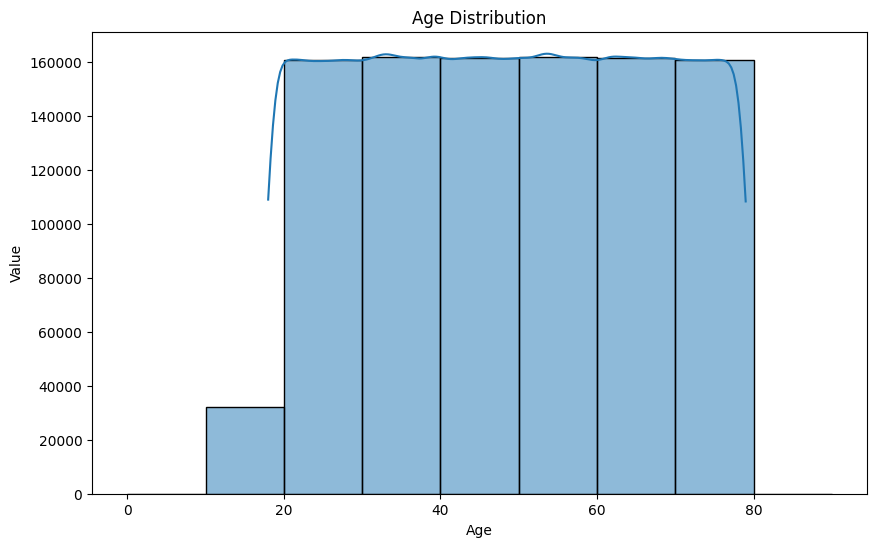

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], kde=True)
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Age Distribution')
plt.show()

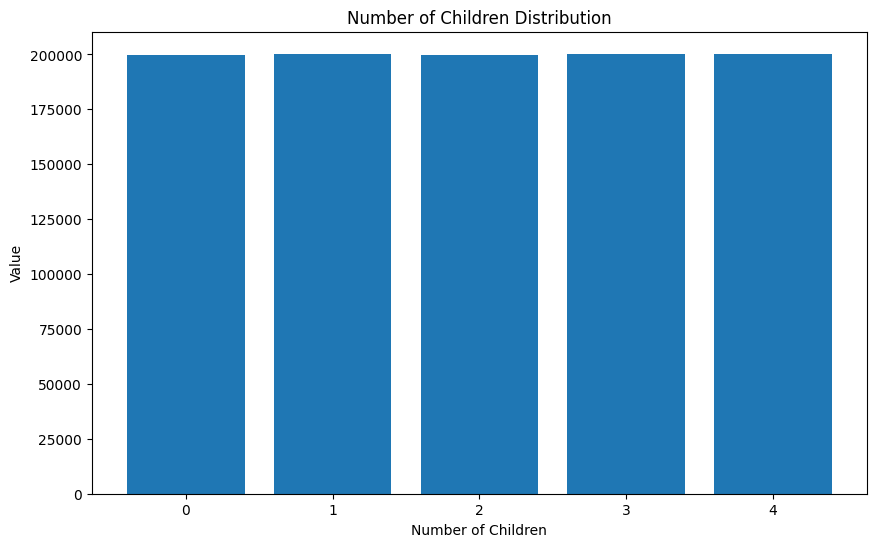

In [ ]:
children = customer_df['number_of_children'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(children.index, children.values)
plt.xlabel('Number of Children')
plt.ylabel('Value')
plt.title('Number of Children Distribution')
plt.show()

## 3. Sale Analysis

In [ ]:
data.head()

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,occupation,transaction_id,transaction_date,product_id,product_category,quantity,unit_price,discount_applied,payment_method,store_location,transaction_hour,day_of_week,week_of_year,month_of_year,avg_purchase_value,purchase_frequency,last_purchase_date,avg_discount_used,preferred_store,online_purchases,in_store_purchases,avg_items_per_transaction,avg_transaction_value,total_returned_items,total_returned_value,total_sales,total_transactions,total_items_purchased,total_discounts_received,avg_spent_per_category,max_single_purchase_value,min_single_purchase_value,product_name,product_brand,product_rating,product_review_count,product_stock,product_return_rate,product_size,product_weight,product_color,product_material,product_manufacture_date,product_expiry_date,product_shelf_life,promotion_id,promotion_type,promotion_start_date,promotion_end_date,promotion_effectiveness,promotion_channel,promotion_target_audience,customer_zip_code,customer_city,customer_state,store_zip_code,store_city,store_state,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,Self-Employed,503290,2020-10-11 10:08:52,1480,Electronics,8,49.72,0.50,Credit Card,Location A,18,Wednesday,27,7,411.13,Weekly,2021-09-11 04:22:38,0.02,Location A,55,86,8.64,171.83,0,750.40,563.16,69,367,415.01,114.28,679.25,0.28,Product D,Brand Y,2.5,560,48,0.40,Small,4.61,Red,Metal,2019-08-04 01:47:01,2022-05-28 14:54:02,250,271,20% Off,2021-07-14 14:28:42,2022-12-30 13:04:13,High,Online,New Customers,37848,City D,State Y,88500,City D,State Y,33.21,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,Unemployed,347796,2021-12-08 01:07:40,1597,Groceries,7,817.76,0.32,Credit Card,Location C,15,Friday,20,2,268.71,Daily,2021-05-16 12:01:16,0.33,Location C,48,2,9.60,20.18,4,551.60,7554.57,8,475,801.79,305.95,491.56,4.65,Product C,Brand X,4.7,413,80,0.30,Medium,0.84,Blue,Metal,2019-10-23 19:59:17,2022-12-19 08:04:41,180,631,Flash Sale,2021-09-23 04:26:09,2022-09-13 03:16:26,Low,Social Media,New Customers,44896,City A,State X,30046,City C,State X,62.56,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,Self-Employed,493688,2020-02-17 09:40:48,5142,Toys,8,270.30,0.35,Debit Card,Location A,9,Saturday,35,6,246.79,Weekly,2021-02-07 16:47:48,0.47,Location B,16,45,1.55,55.17,0,629.19,7564.14,73,138,264.31,426.70,938.26,7.30,Product B,Brand X,4.6,312,14,0.08,Medium,0.23,Green,Plastic,2018-05-12 08:00:29,2023-02-01 12:15:07,131,879,Flash Sale,2021-06-13 12:31:15,2022-03-13 00:53:35,Low,Online,New Customers,11816,City B,State X,26169,City A,State Y,83.04,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,Employed,861348,2020-08-13 00:43:14,8447,Toys,2,547.84,0.10,Credit Card,Location A,13,Friday,42,8,178.92,Weekly,2021-12-30 23:48:26,0.41,Location B,50,47,1.78,15.79,3,346.67,8125.92,20,158,192.93,689.58,644.31,7.31,Product A,Brand Z,1.1,110,69,0.09,Large,4.37,Blue,Wood,2019-11-15 16:17:29,2023-02-05 11:46:57,16,211,Buy One Get One Free,2021-05-23 05:42:48,2022-02-06 00:42:30,High,Social Media,Returning Customers,78604,City A,State Y,22667,City B,State Z,50.43,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,Employed,535835,2021-07-02 11:59:03,6025,Clothing,4,785.29,0.17,Mobile Payment,Location C,17,Monday,37,3,214.06,Yearly,2021-11-02 11:48:25,0.22,Location B,48,42,9.38,240.03,2,979.91,114.32,83,263,497.26,715.86,162.86,1.92,Product C,Brand X,3.8,172,25,0.39,Small,1.68,Red,Metal,2019-08-27 02:58:19,2023-10-05 08:13:07,57,862,Flash Sale,2021-04-19 04:55:32,2022-12-04 13:07:09,Medium,Online,New Customers,17760,City B,State Z,87843,City C,State X,36.55,Yes,Summer,Yes,3,No,Medium,31,Low,242


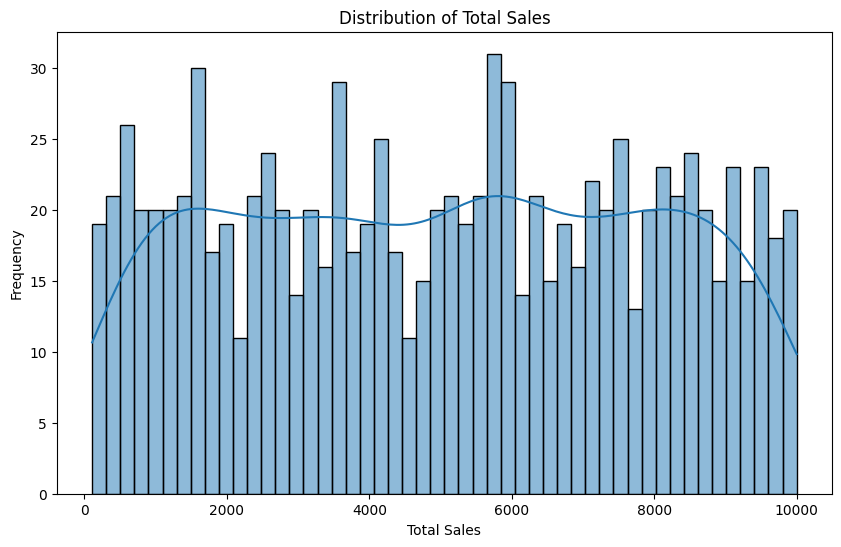

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['total_sales'].head(1000), bins=50, kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

### t-test for the fluence of churn customers on the revenue

In [ ]:
No_churn = data[data['churned'] == 'No']['total_sales'].sample(1000)
Yes_churn = data[data['churned'] == 'Yes']['total_sales'].sample(1000)

In [ ]:
from scipy.stats import chi2_contingency, ttest_ind

def ttest( g1, g2, alpha=0.05):
    test_stat, p_value = ttest_ind(g1, g2, equal_var=False)
    if p_value < alpha:
        significance = "The result is statistically significant."
    else:
        significance = "The result is not statistically significant."
    return test_stat, p_value, significance

In [ ]:
ttest(No_churn, Yes_churn, alpha=0.05)

(-1.8836239134324857,
 0.05976099631074534,
 'The result is not statistically significant.')

### ANOVA Analysis for the influence of three type promotion on revenue


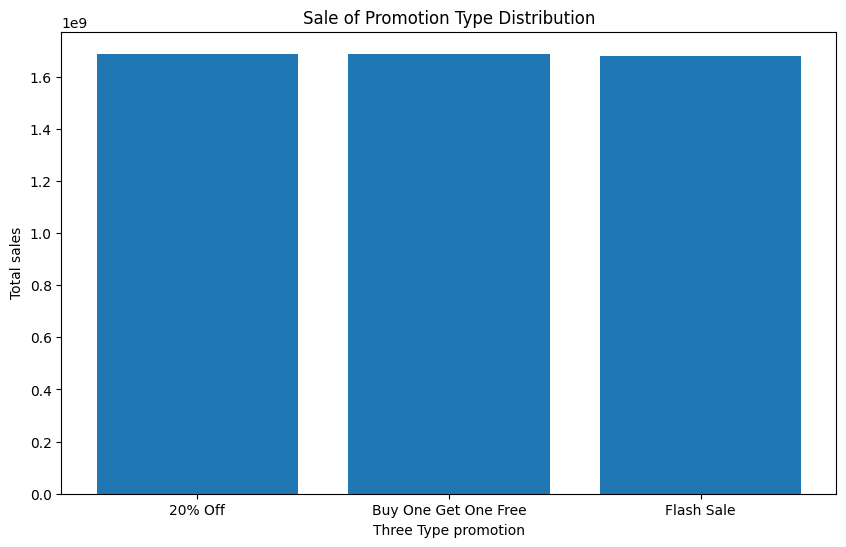

In [ ]:
a = data[['promotion_type', 'total_sales']].groupby('promotion_type').sum()
a = a.reset_index()
plt.figure(figsize=(10, 6))
plt.bar(a['promotion_type'], a['total_sales'])
plt.xlabel('Three Type promotion')
plt.ylabel('Total sales')
plt.title('Sale of Promotion Type Distribution')
plt.show()

**Test the difference in average revenue between three types of promotions using the One-Way ANOVA test, with a significance level of α = 0.05 and the number of sample is 1000 in this experiment.**

  * **Null Hypothesis (H0):** There is no difference in average revenue between the types of promotions. \
  * **Alternative Hypothesis (H1):** At least one pair of promotion types has a difference in average revenue.

In [ ]:
d20_off = data[data['promotion_type'] == '20% Off']['total_sales'].sample(1000)
one_get_one = data[data['promotion_type'] == 'Buy One Get One Free']['total_sales'].sample(1000)
flash_sale = data[data['promotion_type'] == 'Flash Sale']['total_sales'].sample(1000)

In [ ]:
f_statistic, p_value = stats.f_oneway(d20_off, one_get_one, flash_sale)

if p_value < 0.05:
  significance = "The result is statistically significant."
else:
  significance = "The result is not statistically significant."

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")
print(significance)

F-Statistic: 0.26413429842074315
P-Value: 0.767888282251651
The result is not statistically significant.


### ANOVA Analysis for the influence of three channel promotion on revenue


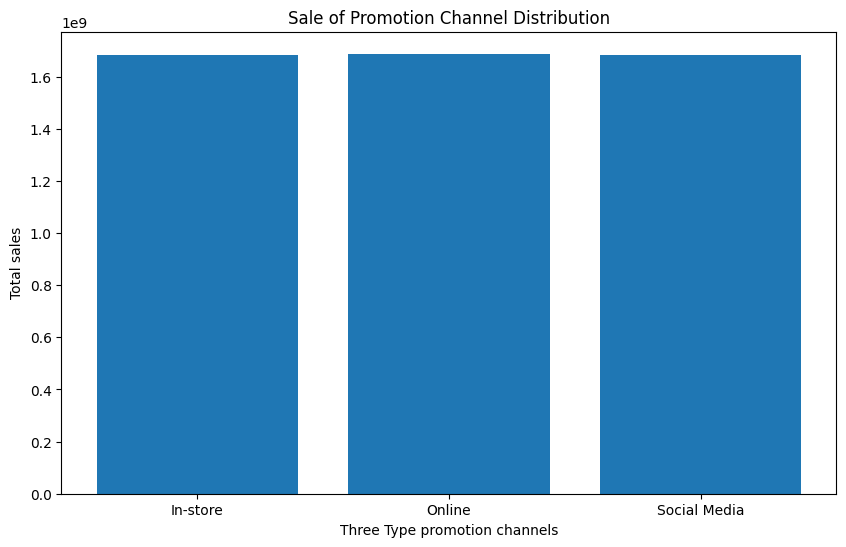

In [ ]:
a = data[['promotion_channel', 'total_sales']].groupby('promotion_channel').sum()
a = a.reset_index()
plt.figure(figsize=(10, 6))
plt.bar(a['promotion_channel'], a['total_sales'])
plt.xlabel('Three Type promotion channels')
plt.ylabel('Total sales')
plt.title('Sale of Promotion Channel Distribution')
plt.show()

In [ ]:
in_store = data[data['promotion_channel'] == 'In-store']['total_sales'].sample(1000)
online = data[data['promotion_channel'] == 'Online']['total_sales'].sample(1000)
social_media = data[data['promotion_channel'] == 'Social Media']['total_sales'].sample(1000)

In [ ]:
f_statistic, p_value = stats.f_oneway(in_store, online, social_media)

if p_value < 0.05:
  significance = "The result is statistically significant."
else:
  significance = "The result is not statistically significant."

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")
print(significance)

F-Statistic: 0.27716609909000123
P-Value: 0.7579480209758037
The result is not statistically significant.
